In [ ]:
import pandas as pd
import numpy as np
import datetime

In [ ]:
FILE_NAME = 'minutes/EURCAD.csv'
dtypes = {'Date': int,
          'Timestamp': str,
          'Open': np.float,
          'High': np.float,
          'Low': np.float,
          'Close': np.float,
          'Volume': np.float}
parse_dates = ['Date', 'Timestamp']
df = pd.read_csv(FILE_NAME,sep=';', header=0, dtype=dtypes)

In [ ]:
def group_by(df, groups):
    return df.groupby(by=groups).agg({'Open': 'first', 'Low': 'min', 'High': 'max', 'Close': 'last', 'Volume': 'sum'})

In [ ]:
# df.query('Date==20140102').describe()
df['Hour'] = df['Timestamp'].apply(lambda x: int(x[:2]))
groups = ['Date']
df_daily = group_by(df, groups).reset_index()
groups = ['Date', 'Hour']
df_hourly = group_by(df, groups).reset_index()

df['Hour'] = df['Timestamp'].apply(lambda x: int(x[:2]))
group_type = 'hourly'
csv_file_name = '{}_{}{}'.format(FILE_NAME[:-4], group_type, FILE_NAME[-4:])
csv_file_name = '/'.join([group_type, csv_file_name.split('/')[1]])
df_hourly.to_csv(csv_file_name, index=False, sep=';')

group_type = 'daily'
csv_file_name = '{}_{}{}'.format(FILE_NAME[:-4], group_type, FILE_NAME[-4:])
csv_file_name = '/'.join([group_type, csv_file_name.split('/')[1]])
df_daily.to_csv(csv_file_name, index=False, sep=';')

In [ ]:
group_type = 'hourly'
csv_file_name = '{}_{}_{}{}'.format(FILE_NAME[:-4], group_type, 'train', FILE_NAME[-4:])
csv_file_name = '/'.join([group_type, csv_file_name.split('/')[1]])
df_hourly.query('Date<20170101').to_csv(csv_file_name)#, index=False)
csv_file_name = '{}_{}_{}{}'.format(FILE_NAME[:-4], group_type, 'validation', FILE_NAME[-4:])
csv_file_name = '/'.join([group_type, csv_file_name.split('/')[1]])
df_hourly.query('Date>=20170101').query('Date<20190101').to_csv(csv_file_name)#, index=False)
csv_file_name = '{}_{}_{}{}'.format(FILE_NAME[:-4], group_type, 'test', FILE_NAME[-4:])
csv_file_name = '/'.join([group_type, csv_file_name.split('/')[1]])
df_hourly.query('Date>=20190101').to_csv(csv_file_name)#, index=False)

In [ ]:
group_type = 'daily'
csv_file_name = '{}_{}_{}{}'.format(FILE_NAME[:-4], group_type, 'train', FILE_NAME[-4:])
csv_file_name = '/'.join([group_type, csv_file_name.split('/')[1]])
df_daily.query('Date<20170101').to_csv(csv_file_name)#, index=False)
csv_file_name = '{}_{}_{}{}'.format(FILE_NAME[:-4], group_type, 'validation', FILE_NAME[-4:])
csv_file_name = '/'.join([group_type, csv_file_name.split('/')[1]])
df_daily.query('Date>=20170101').query('Date<20190101').to_csv(csv_file_name)#, index=False)
csv_file_name = '{}_{}_{}{}'.format(FILE_NAME[:-4], group_type, 'test', FILE_NAME[-4:])
csv_file_name = '/'.join([group_type, csv_file_name.split('/')[1]])
df_daily.query('Date>=20190101').to_csv(csv_file_name)#, index=False)

In [ ]:
FILE_NAME = 'EURCAD_daily.csv'

dtypes = {'Date': int,
          'Open': np.float,
          'High': np.float,
          'Low': np.float,
          'Close': np.float,
          'Volume': np.float}
parse_dates = ['Date', 'Timestamp']
df_daily = pd.read_csv(FILE_NAME,sep=',', header=0, dtype=dtypes)

FILE_NAME = 'EURCAD_hourly.csv'
dtypes = {'Date': int,
          'Hour': str,
          'Open': np.float,
          'High': np.float,
          'Low': np.float,
          'Close': np.float,
          'Volume': np.float}

df_hourly = pd.read_csv(FILE_NAME,sep=',', header=0, dtype=dtypes)

In [ ]:
print("Minute bars: {:,}".format(df.count()['Date']).replace(',', ' '))
print("Hourly bars: {:,}".format(df_hourly.count()['Date']).replace(',', ' '))
print("Daily bars: {:,}".format(df_daily.count()['Date']).replace(',', ' '))

In [ ]:
# df.count()['Date'] / df_hourly.count()['Date']


In [ ]:
df_hourly.query('Date<20160101').head()

In [ ]:
df = pd.read_csv(FILE_NAME,sep=';', header=0, dtype=dtypes)
df.describe()

In [ ]:
df.query('Date>20140200 & Date<20140300').head()

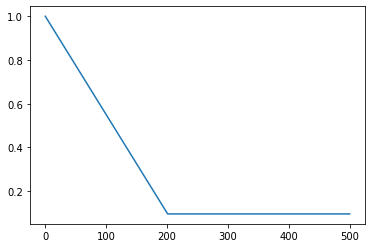

200


In [11]:
import matplotlib.pyplot as plt
e, ed, em = 1, 0.99, 0.1
e_start, e_end, e_steps = 1.0, 0.1, 100
es = [e]
estop = 0
e = e_start
for i in range(500):
    if e > em:
        e -= (e_start - e_end) * 1/e_steps
        estop = i
    es.append(e)

plt.plot(es)
plt.show()
print(estop)

In [16]:
for i in range(e_steps+2):
    print(i, es[i])

0 1
1 0.9955
2 0.9910000000000001
3 0.9865000000000002
4 0.9820000000000002
5 0.9775000000000003
6 0.9730000000000003
7 0.9685000000000004
8 0.9640000000000004
9 0.9595000000000005
10 0.9550000000000005
11 0.9505000000000006
12 0.9460000000000006
13 0.9415000000000007
14 0.9370000000000007
15 0.9325000000000008
16 0.9280000000000008
17 0.9235000000000009
18 0.9190000000000009
19 0.914500000000001
20 0.910000000000001
21 0.9055000000000011
22 0.9010000000000011
23 0.8965000000000012
24 0.8920000000000012
25 0.8875000000000013
26 0.8830000000000013
27 0.8785000000000014
28 0.8740000000000014
29 0.8695000000000015
30 0.8650000000000015
31 0.8605000000000016
32 0.8560000000000016
33 0.8515000000000017
34 0.8470000000000018
35 0.8425000000000018
36 0.8380000000000019
37 0.8335000000000019
38 0.829000000000002
39 0.824500000000002
40 0.8200000000000021
41 0.8155000000000021
42 0.8110000000000022
43 0.8065000000000022
44 0.8020000000000023
45 0.7975000000000023
46 0.7930000000000024
47 0.7885